## Step1. Read Data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/SHQ/Data/cfa_test_df2.csv')

In [ ]:
df.head()

age  gender  hand  ...  edu_level  commute_level  home_env
0  68.0       0     0  ...          0              0         2
1  18.0       1     1  ...          1              0         1
2  18.0       1     1  ...          1              2         2
3  21.0       0     0  ...          0              1         1
4  36.0       1     0  ...          0              1         0

[5 rows x 8 columns]

In [ ]:
# convert some variables to categorical variables and then dummy

test_df = df.copy()
navigation_skills_mapper = {0: 'very bad', 1: 'bad', 2: 'good', 3: 'very good'}
test_df['navigating_skills'] = test_df['navigating_skills'].replace(navigation_skills_mapper)

commute_level_mapper = {0: 'less 30 min', 1: '30 min to 1 h', 2: 'hour plus'}
test_df['commute_level'] = test_df['commute_level'].replace(commute_level_mapper)

env_level_mapper = {0: 'rural', 1: 'mixed', 2: 'urban'}
test_df['home_env'] = test_df['home_env'].replace(env_level_mapper)

test_df = pd.get_dummies(test_df, columns= ["commute_level", "home_env"])

test_df['hand'] = test_df['hand'].astype(str)
test_df['gender']= test_df['gender'].astype(str)
test_df['edu_level'] = test_df['edu_level'].astype(str)
test_df['commute_level_30 min to 1 h'] = test_df['commute_level_30 min to 1 h'].astype(str)
test_df['commute_level_hour plus'] = test_df['commute_level_hour plus'].astype(str)
test_df['commute_level_less 30 min'] = test_df['commute_level_less 30 min'].astype(str)
test_df['home_env_mixed'] = test_df['home_env_mixed'].astype(str)
test_df['home_env_rural'] = test_df['home_env_rural'].astype(str)
test_df['home_env_urban'] = test_df['home_env_urban'].astype(str)



In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909456 entries, 0 to 909455
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          909456 non-null  float64
 1   gender                       909456 non-null  object 
 2   hand                         909456 non-null  object 
 3   navigating_skills            909456 non-null  object 
 4   sleep                        909456 non-null  float64
 5   edu_level                    909456 non-null  object 
 6   commute_level_30 min to 1 h  909456 non-null  object 
 7   commute_level_hour plus      909456 non-null  object 
 8   commute_level_less 30 min    909456 non-null  object 
 9   home_env_mixed               909456 non-null  object 
 10  home_env_rural               909456 non-null  object 
 11  home_env_urban               909456 non-null  object 
dtypes: float64(2), object(10)
memory usage: 83.3+ MB


In [ ]:
df = test_df.copy()

# Step2. Impurity-based Feature Importance

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
#feature_names = ['age', 'gender', 'hand', 'navigating_skills', 'sleep', 'edu_level', 'commute_level', 'home_env']
#features = ['age', 'gender', 'hand', 'navigating_skills', 'sleep', 'edu_level', 'commute_level_30 min to 1 h', 'commute_level_hour plus', 'commute_level_less 30 min', 'home_env_mixed', 'home_env_rural', 'home_env_urban']

X = df.drop('navigating_skills', axis = 1)
y = df['navigating_skills']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
#rf = RandomForestRegressor(n_estimators=100)

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.feature_importances_

array([0.51026766, 0.20172533, 0.01881256, 0.17554216, 0.02816034,
       0.00704484, 0.03338544, 0.01144375, 0.00453208, 0.0043222 ,
       0.00476363])

<BarContainer object of 11 artists>

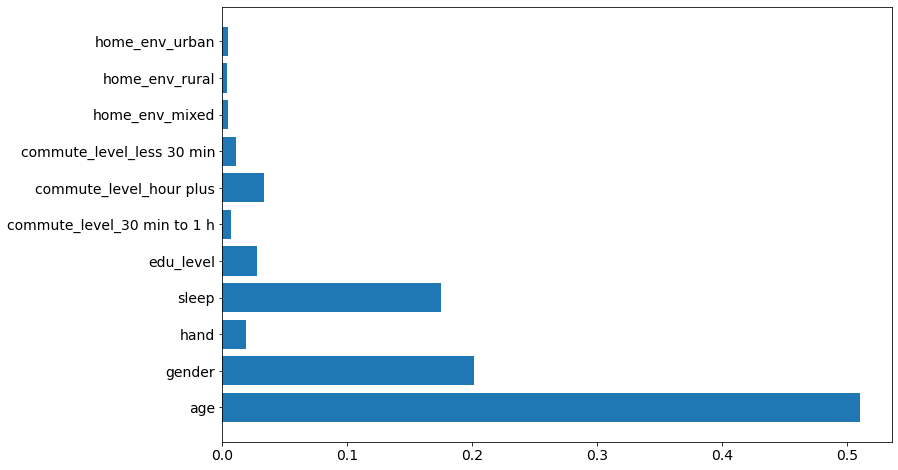

In [ ]:
plt.barh(X.columns, rf.feature_importances_)


Text(0.5, 0, 'Random Forest Feature Importance')

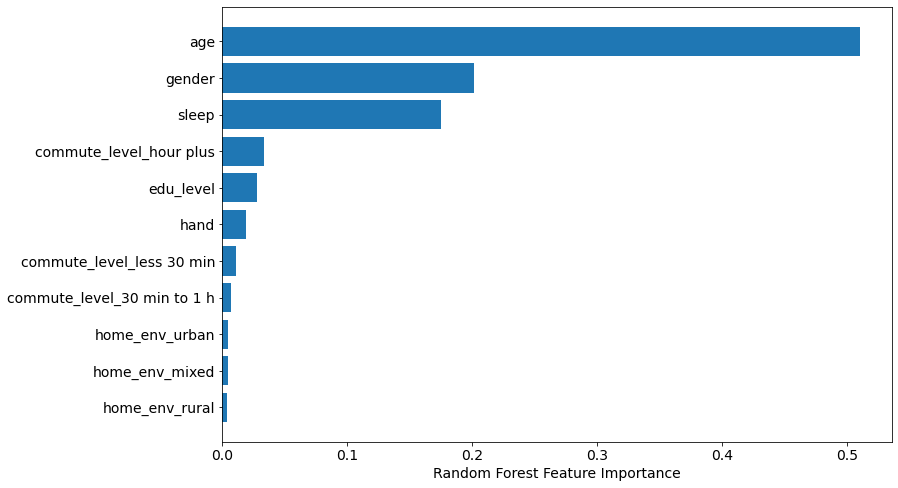

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Step3. Permutation Test

In [ ]:
# The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

### Ranking after dummy all variables

Text(0.5, 0, 'Permutation Importance')

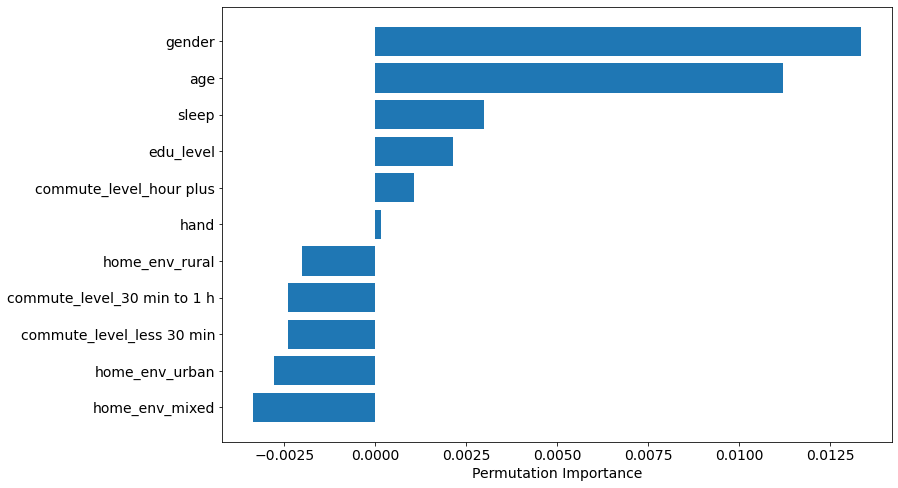

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import permutation_importance
#import shap
from matplotlib import pyplot as plt

# prepare the data
# boston = load_boston()
X = df.drop('navigating_skills', axis = 1)
y = df['navigating_skills']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# train the model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# the permutation based importance
perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### Ranking without dummay (an alternative visualization)

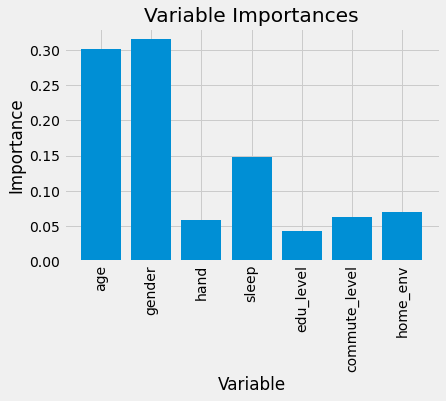

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Step 4. Goodness of Fit Calculation

In [ ]:
model = RandomForestRegressor()

df_train, df_test = train_test_split(df, test_size=0.20)

features = ['age', 'gender', 'hand', 'navigating_skills', 'sleep', 'edu_level', 'commute_level', 'home_env']
#features = ['age', 'gender', 'hand', 'navigating_skills', 'sleep', 'edu_level', 'commute_level_30 min to 1 h', 'commute_level_hour plus', 'commute_level_less 30 min', 'home_env_mixed', 'home_env_rural', 'home_env_urban']


df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('navigating_skills',axis=1), df_train['navigating_skills']
X_test, y_test = df_test.drop('navigating_skills',axis=1), df_test['navigating_skills']


In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### MSE

In [ ]:
from sklearn.metrics import mean_squared_error


errors = mean_squared_error(y_test, model.predict(X_test))

errors

0.4580291566556648

### RMSE

In [ ]:
errors = mean_squared_error(y_test, model.predict(X_test), squared=False)

errors

0.676778513736706

### MAE

In [ ]:
from sklearn.metrics import mean_absolute_error

errors = mean_absolute_error(y_test, model.predict(X_test))
# report error
print(errors)

0.5172584594646921


## Step5. Local Visualization: LIME plot

In [ ]:
pip install -U pdpbox

In [ ]:
from pdpbox import pdp, info_plots


In [ ]:
pip install -U scikit-learn


In [ ]:
!pip install numpy 
!pip install scipy

In [ ]:
model_rf = RandomForestClassifier(max_depth= 6)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
accuracy = accuracy_score(y_test, model_rf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.10%


In [ ]:
print(classification_report(y_test, model_rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.10      0.00      0.00      4601
           1       0.15      0.00      0.00     25366
           2       0.57      0.92      0.70    127086
           3       0.46      0.15      0.22     70311

    accuracy                           0.56    227364
   macro avg       0.32      0.27      0.23    227364
weighted avg       0.48      0.56      0.46    227364



In [ ]:
predict_fn_rf = lambda x: model_rf.predict_proba(x).astype(float)

In [ ]:
feature_names = ['age', 'gender', 'hand', 'sleep', 'edu_level', 'commute_level', 'home_env']


In [ ]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)

In [ ]:
X_train

age gender hand  ...  home_env_mixed home_env_rural home_env_urban
662952  18.0      0    0  ...               1              0              0
291339  18.0      0    0  ...               1              0              0
739557  22.0      1    1  ...               0              1              0
276141  28.0      0    0  ...               0              0              1
339677  50.0      0    0  ...               1              0              0
...      ...    ...  ...  ...             ...            ...            ...
606905  31.0      1    0  ...               1              0              0
760353  62.0      0    0  ...               1              0              0
629061  18.0      1    0  ...               0              0              1
713149  18.0      0    0  ...               1              0              0
118885  42.0      0    0  ...               0              1              0

[727564 rows x 11 columns]

In [ ]:
X_train.columns

Index(['age', 'gender', 'hand', 'sleep', 'edu_level',
       'commute_level_30 min to 1 h', 'commute_level_hour plus',
       'commute_level_less 30 min', 'home_env_mixed', 'home_env_rural',
       'home_env_urban'],
      dtype='object')

In [ ]:
features = ['age', 'gender', 'hand', 'sleep', 'edu_level',
       'commute_level_30 min to 1 h', 'commute_level_hour plus',
       'commute_level_less 30 min', 'home_env_mixed', 'home_env_rural',
       'home_env_urban']

In [ ]:
# create the lime explainer
from lime import lime_tabular
# ['good', 'bad', 'very good', 'very bad']

explainer = lime_tabular.LimeTabularExplainer(x_train, mode = "classification", class_names= class_names, feature_names = features ,)
explainer

In [ ]:
# 
idx = random.randint(1, len(x_test))

print("Prediction : ", model_rf.predict(x_test[idx].reshape(1,-1))[0])
print("Actual :     ", y_test_np[idx])

explanation = explainer.explain_instance(x_test[idx], model_rf.predict_proba, top_labels=3)

explanation.show_in_notebook()

Prediction :  good
Actual :      good


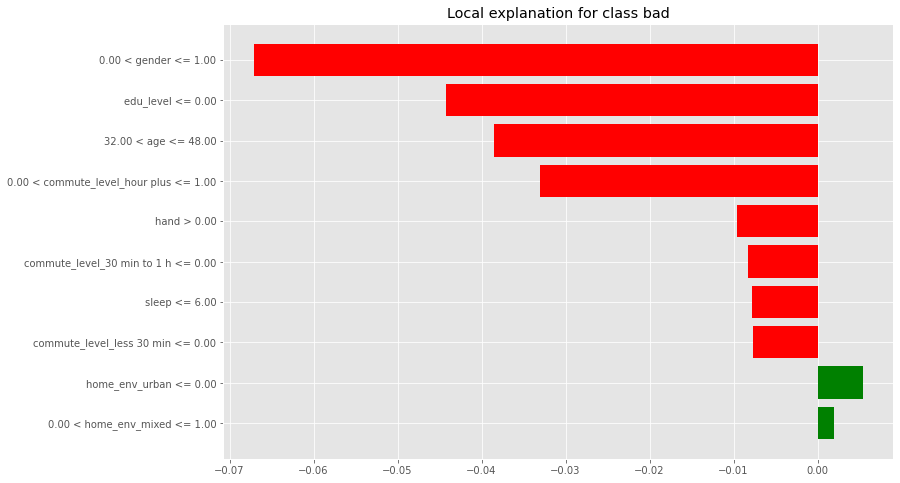

In [ ]:
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

In [ ]:
preds = model_rf.predict(x_test)

false_preds = np.argwhere((preds != y_test_np)).flatten()

idx  = random.choice(false_preds)


print("Prediction : ", model_rf.predict(x_test[idx].reshape(1,-1))[0])
print("Actual :     ", y_test_np[idx])

explanation = explainer.explain_instance(x_test[idx], model_rf.predict_proba, top_labels=3)

explanation.show_in_notebook()

Prediction :  good
Actual :      very good


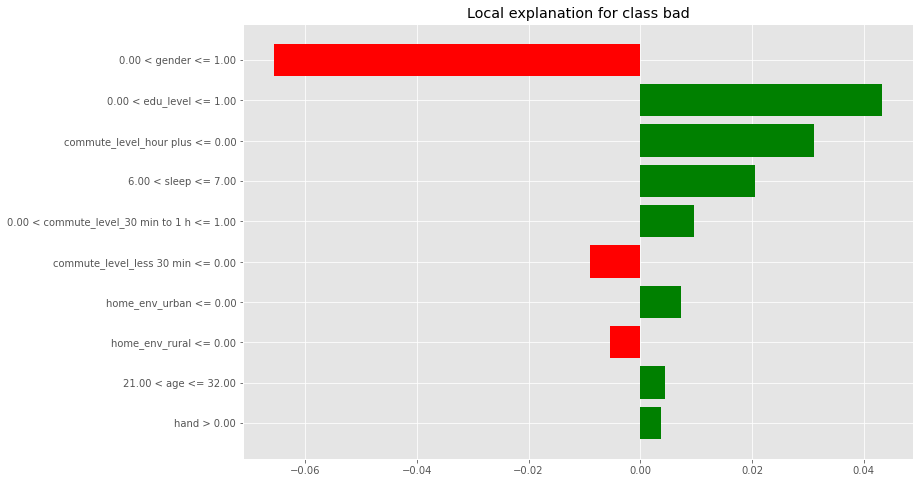

In [ ]:
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

In [ ]:
print("Explanation Local Prediction              : ", explanation.local_pred)
print("Explanation Global Prediction Probability : ", explanation.predict_proba)
print("Explanation Global Prediction             : ", class_names[np.argmax(explanation.predict_proba)])

Explanation Local Prediction              :  [0.43671806]
Explanation Global Prediction Probability :  [0.02483611 0.56336777 0.         0.41179611]
Explanation Global Prediction             :  bad


In [ ]:
explanation.as_map()


{0: [(1, 0.3077639213125094),
  (0, -0.04451472231425309),
  (6, 0.02911497085503871),
  (4, -0.026594284815935534),
  (5, 0.005679325780119143),
  (3, -0.005491392540918444),
  (2, -0.0008153858820842767)],
 1: [(1, -0.3077639213125094),
  (0, 0.04451472231425309),
  (6, -0.02911497085503871),
  (4, 0.026594284815935534),
  (5, -0.005679325780119143),
  (3, 0.005491392540918444),
  (2, 0.0008153858820842767)]}

In [ ]:
from IPython.display import HTML

html_data = explanation.as_html()
HTML(data=html_data)

# Step6. Global Visualization: Partial Dependence Plot

In [ ]:
!pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.0
Uninstalling scikit-learn-1.0:
  Successfully uninstalled scikit-learn-1.0


In [ ]:
!pip install -U scikit-learn


  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)


In [ ]:
import sklearn

sklearn.__version__

'1.0'

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence, PartialDependenceDisplay
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from time import time


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


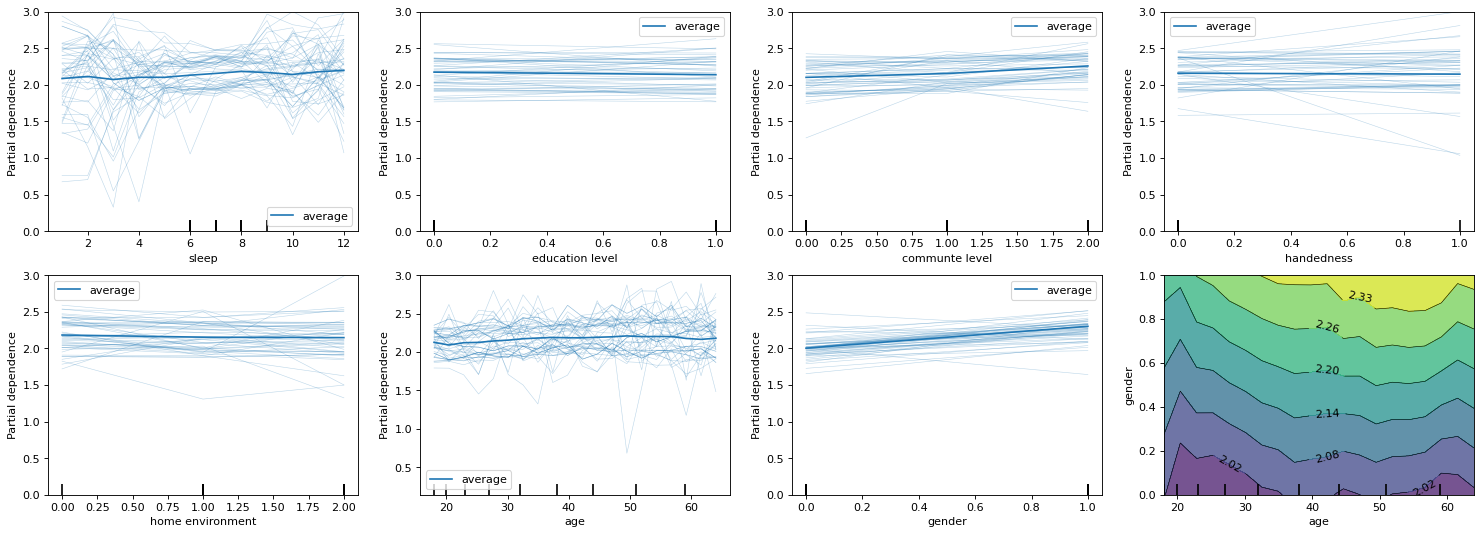

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.pyplot import figure


figure(figsize=(23, 8), dpi=80)


ax1 = plt.subplot(241)
#ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit

display = plot_partial_dependence(
    model_rf, X_train, ['sleep'], kind='both', subsample=50, n_jobs=3, grid_resolution=20,
    ax=ax1
)
#ax1.plot(t1, f(t1))

#ax1.set_xlabel('Zoomed out')


ax2 = plt.subplot(242)
#ax2.margins(x=0, y=-0.25)           # Values >0.0 zoom out

display = plot_partial_dependence(
    model_rf, X_train, ['edu_level'], kind='both', subsample=50, n_jobs=3, grid_resolution=20,
    ax=ax2
)
# ax2.plot(t1, f(t1))
#ax2.set_title('Zoomed out')
display.axes_[0][0].set_xlabel("education level")


ax3 = plt.subplot(243)
#ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center

display = plot_partial_dependence(
    model_rf, X_train, ['commute_level'], kind='both', subsample=50, n_jobs=3, grid_resolution=20,
    ax=ax3
)
#ax3.plot(t1, f(t1))
#ax3.set_title('Zoomed in')
display.axes_[0][0].set_xlabel("communte level")


ax4 = plt.subplot(244)
#ax4.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center

display = plot_partial_dependence(
    model_rf, X_train, ['hand'], kind='both', subsample=50, n_jobs=3, grid_resolution=20,
    ax=ax4
)
#ax3.plot(t1, f(t1))
#ax4.set_title('Zoomed in')
display.axes_[0][0].set_xlabel("handedness")



ax5 = plt.subplot(245)
#ax5.margins(0.05)           # Default margin is 0.05, value 0 means fit
# ax5.plot(t1, f(t1))

display = plot_partial_dependence(
    model_rf, X_train, ['home_env'], kind='both', subsample=50, n_jobs=3, grid_resolution=20,
    ax=ax5
)
#ax5.set_title('Zoomed in')
display.axes_[0][0].set_xlabel("home environment")


ax6 = plt.subplot(246)
#ax6.margins(2, 2)           # Values >0.0 zoom out
# ax2.plot(t1, f(t1))
display = plot_partial_dependence(
    model_rf, X_train, ['age'], kind='both', subsample=50, n_jobs=3, grid_resolution=20,
    ax=ax6
)
#ax6.set_title('Zoomed out')

ax7 = plt.subplot(247)
#ax7.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
# ax3.plot(t1, f(t1))
display = plot_partial_dependence(
    model_rf, X_train, ['gender'], kind='both', subsample=50, n_jobs=3, grid_resolution=20,
    ax=ax7
)
# ax7.set_title('Zoomed in')


ax8 = plt.subplot(248)
#ax8.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
# ax3.plot(t1, f(t1))
display = plot_partial_dependence(
    model_rf, X_train, [('age', 'gender')], kind='average', n_jobs=3, grid_resolution=20,
    ax=ax8
)
# ax8.set_title('Zoomed in')

plt.show()